# Exploratory Data Analysis of Purchases by the State of California

In [1]:
import pandas            as pd;
import numpy             as np;
import seaborn           as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

In [2]:
df = pd.read_csv('../input/PURCHASE ORDER DATA EXTRACT 2012-2015_0.csv', parse_dates=["Creation Date"])

Let's take a quick look at how the data looks like.

In [12]:
df.head()

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,2013-08-27,NaN,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,NaN,WSCA/Coop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-29,NaN,2013-2014,NaN,REQ0011932,REQ0011932,NON-IT Goods,NaN,Informal Competitive,NaN,...,76121504,76121504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-01,NaN,2013-2014,NaN,REQ0011476,REQ0011476,IT Services,NaN,Informal Competitive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95841\n(38.662263, -121.346136)"
3,2014-06-13,06/05/2014,2013-2014,NaN,4500236642,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"91436\n(34.151642, -118.49051)"
4,2014-03-12,03/12/2014,2013-2014,1-10-75-60A,4500221028,NaN,NON-IT Goods,NaN,Statewide Contract,NaN,...,44103127,44103127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95814\n(38.580427, -121.494396)"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 31 columns):
Creation Date              346018 non-null datetime64[ns]
Purchase Date              328582 non-null object
Fiscal Year                346018 non-null object
LPA Number                 92345 non-null object
Purchase Order Number      346018 non-null object
Requisition Number         14369 non-null object
Acquisition Type           346018 non-null object
Sub-Acquisition Type       68337 non-null object
Acquisition Method         346018 non-null object
Sub-Acquisition Method     30896 non-null object
Department Name            346018 non-null object
Supplier Code              345982 non-null float64
Supplier Name              345982 non-null object
Supplier Qualifications    141745 non-null object
Supplier Zip Code          275908 non-null object
CalCard                    346018 non-null object
Item Name                  345988 non-null object
Item Description           345891 

Looks like things tend to get purchased on the first day of the month.

In [6]:
df.describe()

,Supplier Code,Quantity,Normalized UNSPSC,Class,Family,Segment
count,3.459820e+05,3.459880e+05,3.450010e+05,3.427230e+05,3.427230e+05,3.427230e+05
mean,8.434345e+05,2.316154e+03,4.932197e+07,4.927633e+07,4.927219e+07,4.913283e+07
std,2.461186e+06,1.058259e+05,2.246967e+07,2.246105e+07,2.246430e+07,2.246636e+07
min,0.000000e+00,1.000000e-04,3.018170e+05,1.010150e+07,3.018000e+06,1.000000e+07
25%,2.729200e+04,1.000000e+00,3.911171e+07,3.911160e+07,3.911000e+07,3.900000e+07
50%,1.012531e+06,1.000000e+00,4.412160e+07,4.412150e+07,4.412000e+07,4.400000e+07
75%,1.482180e+06,6.000000e+00,7.210151e+07,7.116110e+07,7.116000e+07,7.100000e+07
max,9.548318e+08,2.000000e+07,9.514190e+07,9.514190e+07,9.514000e+07,9.500000e+07


# Missing Data?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


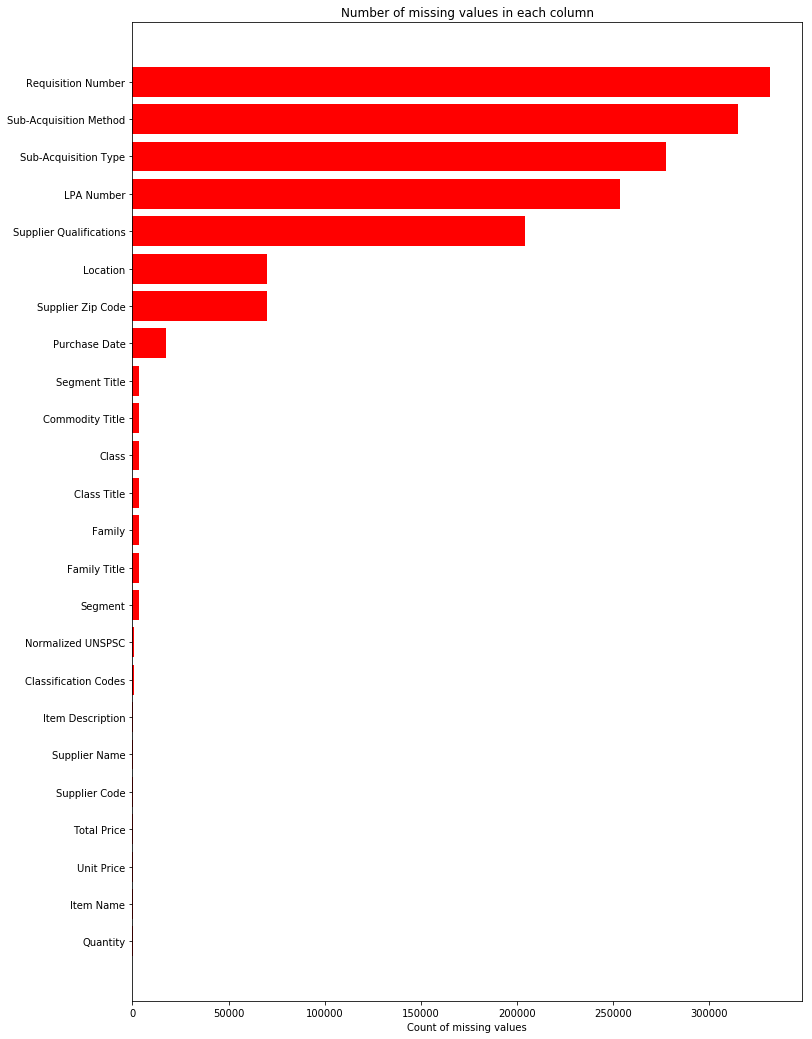

In [41]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

# Time Dependence of the Creation Date

Purchases tend to be logged more or less evently throughout the month.

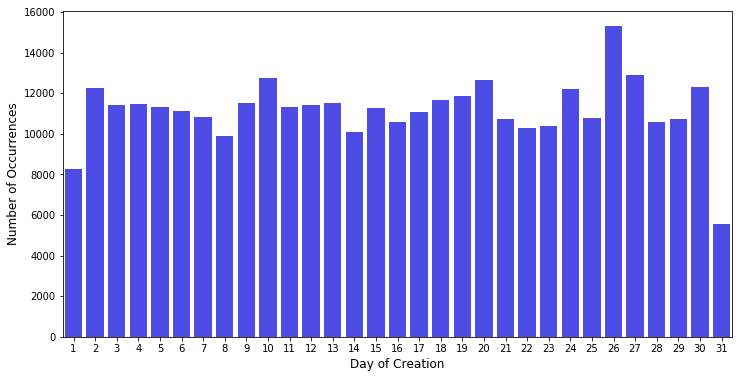

In [43]:
df['Creation Day'] = df['Creation Date'].dt.day

cnt_srs = df['Creation Day'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
#plt.xticks(rotation='vertical')
plt.xlabel('Day of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Most of the entries are made in June.

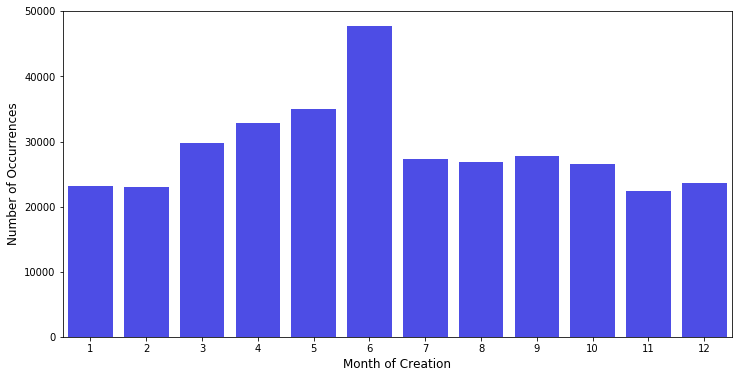

In [46]:
df['Creation Month'] = df['Creation Date'].dt.month

cnt_srs = df['Creation Month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
#plt.xticks(rotation='vertical')
plt.xlabel('Month of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

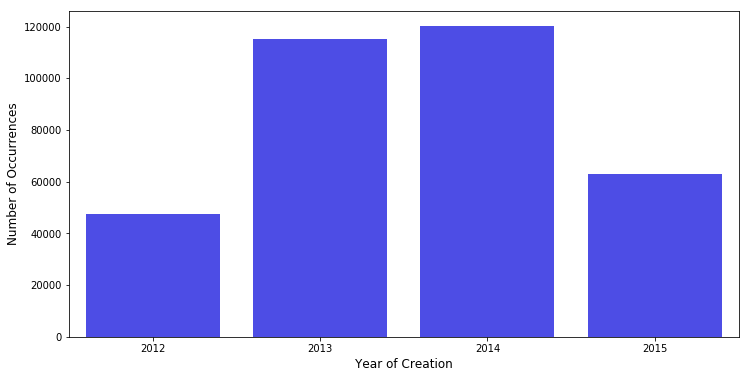

In [47]:
df['Creation Year'] = df['Creation Date'].dt.year

cnt_srs = df['Creation Year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
#plt.xticks(rotation='vertical')
plt.xlabel('Year of Creation', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

# Time Dependence of Purchase Date

In [ ]:
# there are some erroneous values in the year like 2510 and 1014, so we'll clean that up
df['Purchase Date'] = pd.to_datetime([date[:-4]+'20'+date[-2:] for date in df['Purchase Date'].dropna().values])

Looks like things tend to get purchased on the first day of the month.

In [ ]:
df['Purchase Day'] = df['Purchase Date'].dt.day

cnt_srs = df['Purchase Day'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
#plt.xticks(rotation='vertical')
plt.xlabel('Day of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Purchases peak in May, June, and July. The US fiscal year ends in September, so this may be an end of the year rush to finish purchases.

In [ ]:
df['Purchase Month'] = df['Purchase Date'].dt.month

cnt_srs = df['Purchase Month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
#plt.xticks(rotation='vertical')
plt.xlabel('Month of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Most of the purchases were made in 2013-2014. Interestingly there are some future values, possibly erroneous, possibly purchases made on a subscription.

In [ ]:
df['Purchase Year'] = df['Purchase Date'].dt.year

cnt_srs = df['Purchase Year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Purchase', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

# Acquisition Type

In [ ]:
df['Acquisition Type'].unique().tolist()

Most acquisitions are not IT related...

In [ ]:
cnt_srs = df['Acquisition Type'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
#plt.xticks(rotation='vertical')
plt.xlabel('Acquisition Type', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

...and they tend to be "personal services"

In [10]:
df['Sub-Acquisition Type'].unique().tolist()

[nan,
 'Personal Services',
 'Legal Services',
 'Consulting Services',
 'Public Works',
 'Interagency Agreements',
 'Services are specifically exempt by statute',
 'Nonprofit Organizations',
 'Memberships',
 'Joint Power Agreement',
 'Emergency Contract',
 'Agreements with other governmental entities and public universities',
 'Expert Witneses',
 'Subvention and Local Assistance',
 'UC, CSU, Community Colleges, and foundations / auxiliaries',
 'Elevator Maintenance',
 'Convention and Conference Services',
 'Architectural and Engineering',
 'Printing Services',
 'Contracts with Local Governments',
 'Contracting for Students',
 'Fiscal Intermediaries',
 'Federally Funded',
 'Hazardous Activities',
 'Revenue Agreements',
 'Commercial Office Moving Services']

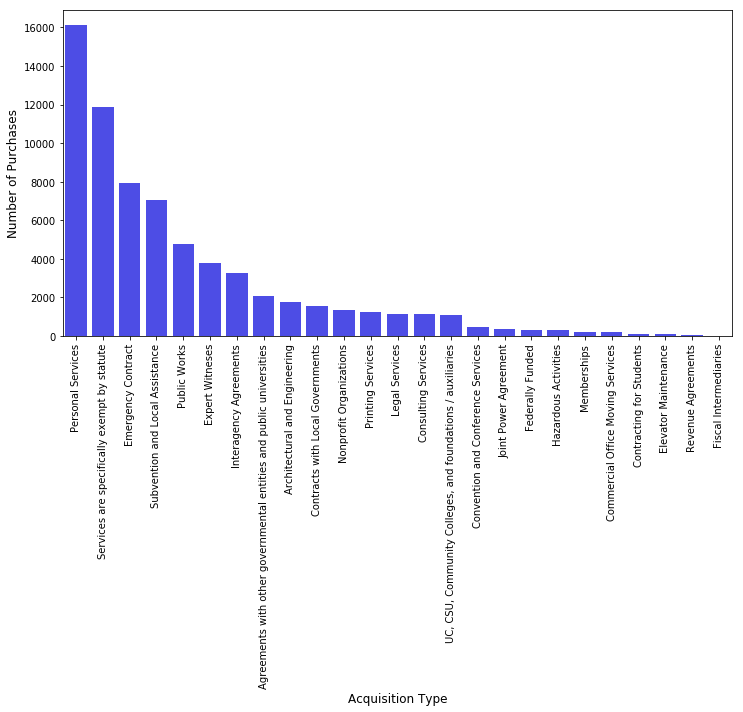

In [11]:
cnt_srs = df['Sub-Acquisition Type'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Acquisition Type', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

The most common purchase type is an "informal competition" followed by a statewide contract

In [12]:
df['Acquisition Method'].unique().tolist()

['WSCA/Coop',
 'Informal Competitive',
 'Statewide Contract',
 'Services are specifically exempt by statute',
 'SB/DVBE Option',
 'NCB',
 'Formal Competitive',
 'Fair and Reasonable',
 'State Programs',
 'Services are specifically exempt by policy',
 'CMAS',
 'LCB',
 'Master Purchase/Price Agreement',
 'Master Service Agreement',
 'Emergency Purchase',
 'CRP',
 'Software License Program',
 'Special Category Request (SCR)',
 'Statement of Qualifications',
 'State Price Schedule']

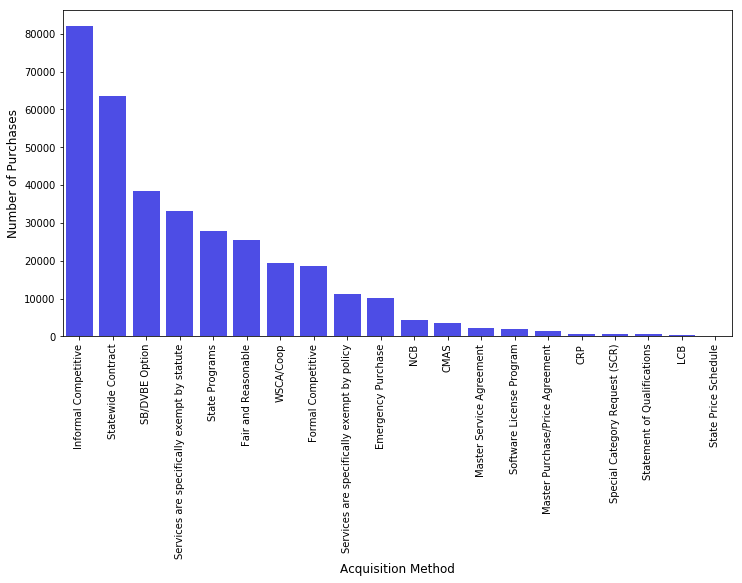

In [14]:
cnt_srs = df['Acquisition Method'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Acquisition Method', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

In [15]:
df['Sub-Acquisition Method'].unique().tolist()

[nan,
 'Other',
 'Prison Industry Authority (PIA)',
 'Office of State Printing (OSP)',
 'Only goods and services that meet needs of the State',
 'Services are specifically exempt by statute',
 'Emergency acquisition for the protection of the public',
 'Contract with other government agency',
 'A single firm services a geographic region',
 'Interagency Agreement',
 'Fleet',
 'Transportation Management Unit (TMU)',
 'Master Service Agreement',
 'Legal defense advice or services by an attorney or staff',
 'SB/DVBE Option',
 'Subvention contracts with private/non-profit entity/agency',
 'Surplus']

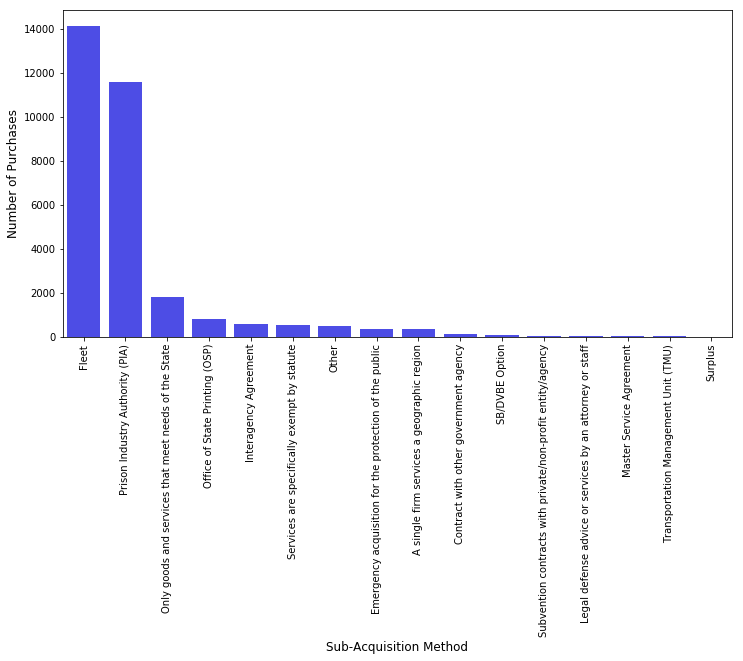

In [48]:
cnt_srs = df['Sub-Acquisition Method'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Sub-Acquisition Method', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

In [16]:
df['Supplier Code']

0         1740272.0
1         1760085.0
2           17224.0
3         1754462.0
4         1087660.0
5         1738777.0
6         1087660.0
7         1069280.0
8         1087660.0
9         1014234.0
10           4812.0
11        1503144.0
12          38819.0
13        1017216.0
14        1758289.0
15        1758289.0
16        1758289.0
17          48199.0
18        1327540.0
19          45803.0
20        1746707.0
21        1065902.0
22        1008361.0
23        1001493.0
24        1738091.0
25          47767.0
26        1017216.0
27        1613860.0
28        1000709.0
29          13274.0
            ...    
345988    1014810.0
345989    1087660.0
345990    1065902.0
345991    1000624.0
345992      12205.0
345993       2645.0
345994    1001147.0
345995    1018540.0
345996       1718.0
345997        837.0
345998      53971.0
345999      29177.0
346000      47496.0
346001      29806.0
346002    1087660.0
346003       7511.0
346004      15228.0
346005      28553.0
346006    1000530.0


# Total Price

Fill the total price Nan

In [50]:
df["Unit Price"] = df["Unit Price"].str.replace("$", "").astype(float)
df["Total Price"] = df["Total Price"].str.replace("$", "").astype(float)

df["Unit Price"] = df["Unit Price"].fillna(0)
df["Quantity"] = df["Quantity"].fillna(0)

In [59]:
df["Total Price"] = df.apply(
    lambda row: row["Unit Price"] * row["Quantity"] if pd.isnull(row["Total Price"]) and not pd.isnull(row["Unit Price"]) and not pd.isnull(row["Quantity"]) else row["Total Price"],
    axis=1
)
df["Total Price"] = df["Total Price"].fillna(0)


In [60]:
print('Minimum Purchase Price = ' + str(min(purchase_prices)))
print('Maximum Purchase Price = ' + str(max(purchase_prices)))
print('Average Purchase Price = ' + str(np.mean(purchase_prices)))

Minimum Purchase Price = -30861228.0
Maximum Purchase Price = 7337038064.0
Average Purchase Price = 437135.335613


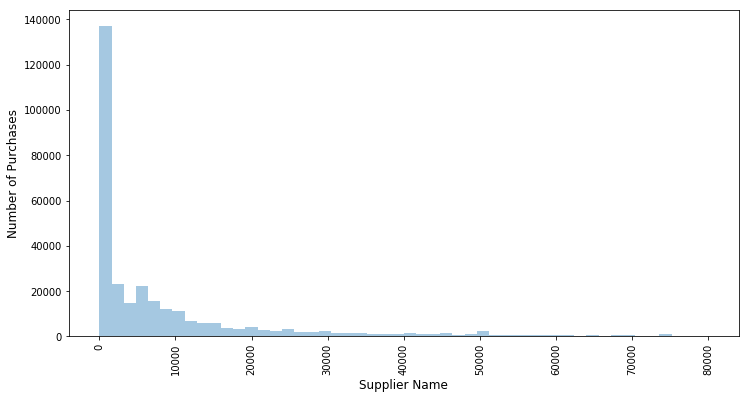

In [61]:
# let's plot without these negative and extremely large positive numbers, which don't sound correct

plt.figure(figsize=(12,6))
sns.distplot([x for x in purchase_prices if x > 0 and x < 8e4], kde=False)
plt.xticks(rotation='vertical')
plt.xlabel('Supplier Name', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.show()

## Supplier Name

Top 10 Suppliers by Purchase Orders:
Prison Industry Authority                   5810
3B INDUSTRIES INC                           4163
TAGG Industries, Inc.                       3284
Grainger Industrial Supply                  3143
Unknown                                     3032
Technology Integration Group                2951
CONFIDENTIAL - Information Withheld         2896
McKesson Medical - Surgical Minnesota Su    2831
Smile Business Products, Inc                2447
San Joaquin Distributors, Inc.              2061
Name: Supplier Name, dtype: int64


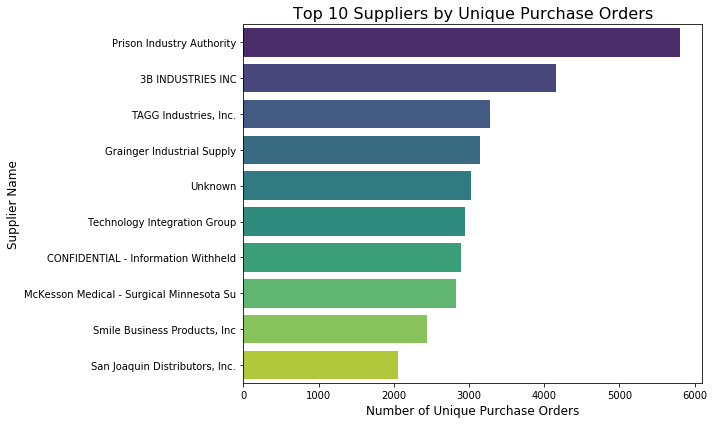

In [62]:
unique_suppliers = df.drop_duplicates(subset=["Supplier Name", "Purchase Order Number"])

# Top 10 suppliers by unique purchase orders
top_suppliers = unique_suppliers["Supplier Name"].value_counts().head(10)
print("Top 10 Suppliers by Purchase Orders:")
print(top_suppliers)

# Plot the top 10 suppliers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette="viridis")
plt.title("Top 10 Suppliers by Unique Purchase Orders", fontsize=16)
plt.xlabel("Number of Unique Purchase Orders", fontsize=12)
plt.ylabel("Supplier Name", fontsize=12)
plt.tight_layout()
plt.show()


In [26]:
 unique_suppliers["Supplier Name"].value_counts()

Prison Industry Authority                                   5810
3B INDUSTRIES INC                                           4163
TAGG Industries, Inc.                                       3284
Grainger Industrial Supply                                  3143
Unknown                                                     3032
Technology Integration Group                                2951
CONFIDENTIAL - Information Withheld                         2896
McKesson Medical - Surgical Minnesota Su                    2831
Smile Business Products, Inc                                2447
San Joaquin Distributors, Inc.                              2061
Western Blue, an NWN Company                                1983
Bay Medical Co., Inc                                        1541
Amerisource Bergen Drug Corporation                         1458
Adolph Inc.                                                 1408
Seafood Dimensions Intn'l Inc.                              1312
Christian Bartels Enterpr

NO     340646
YES      5372
Name: CalCard, dtype: int64


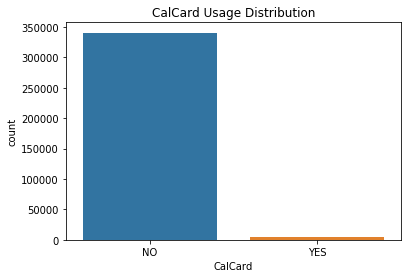

In [28]:
# Count of CalCard usage
calcard_usage = df["CalCard"].value_counts()
print(calcard_usage)

# Plot distribution
sns.countplot(x="CalCard", data=df)
plt.title("CalCard Usage Distribution")
plt.show()

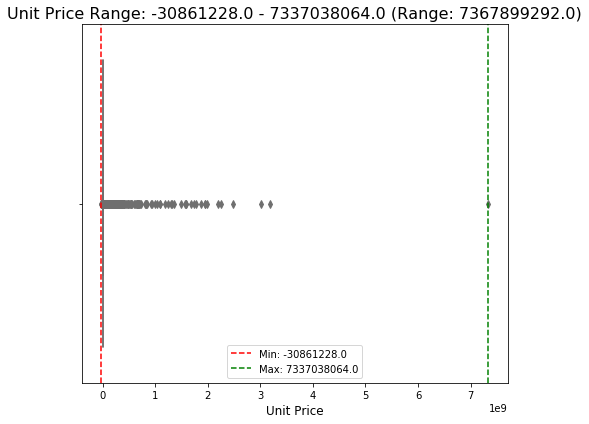

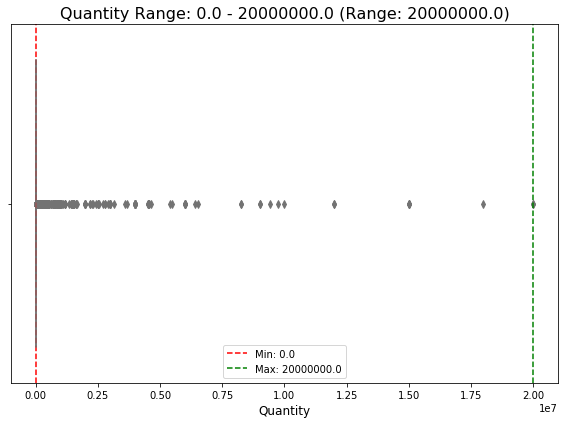

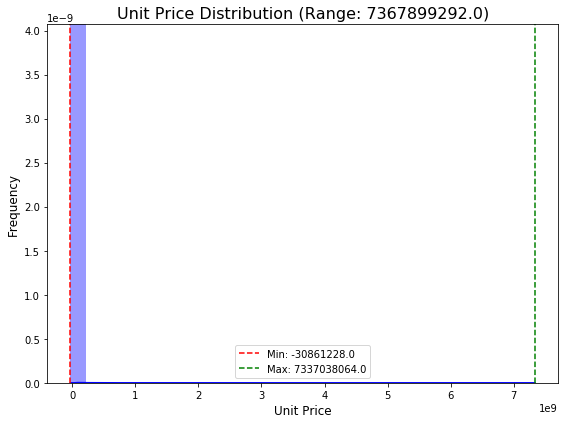

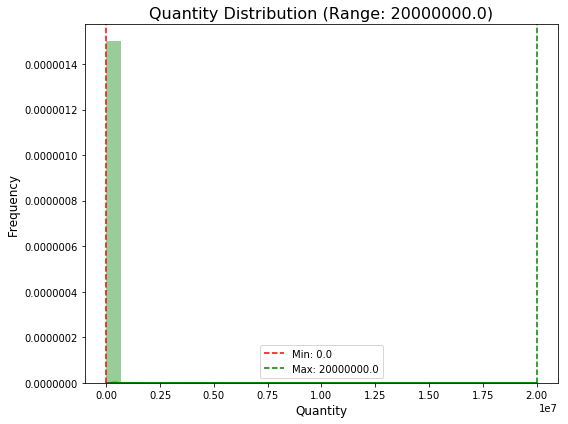

In [67]:
# Calculate ranges
unit_price_min, unit_price_max = df["Unit Price"].min(), df["Unit Price"].max()
quantity_min, quantity_max = df["Quantity"].min(), df["Quantity"].max()

unit_price_range = unit_price_max - unit_price_min
quantity_range = quantity_max - quantity_min

# Plot Unit Price Range (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Unit Price", color="skyblue")
plt.axvline(unit_price_min, color="red", linestyle="--", label=f"Min: {unit_price_min}")
plt.axvline(unit_price_max, color="green", linestyle="--", label=f"Max: {unit_price_max}")
plt.title(f"Unit Price Range: {unit_price_min} - {unit_price_max} (Range: {unit_price_range})", fontsize=16)
plt.xlabel("Unit Price", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Quantity Range (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Quantity", color="lightgreen")
plt.axvline(quantity_min, color="red", linestyle="--", label=f"Min: {quantity_min}")
plt.axvline(quantity_max, color="green", linestyle="--", label=f"Max: {quantity_max}")
plt.title(f"Quantity Range: {quantity_min} - {quantity_max} (Range: {quantity_range})", fontsize=16)
plt.xlabel("Quantity", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Histogram of Unit Price
plt.figure(figsize=(8, 6))
sns.distplot(df["Unit Price"], bins=30, kde=True, color="blue")
plt.axvline(unit_price_min, color="red", linestyle="--", label=f"Min: {unit_price_min}")
plt.axvline(unit_price_max, color="green", linestyle="--", label=f"Max: {unit_price_max}")
plt.title(f"Unit Price Distribution (Range: {unit_price_range})", fontsize=16)
plt.xlabel("Unit Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Histogram of Quantity
plt.figure(figsize=(8, 6))
sns.distplot(df["Quantity"], bins=30, kde=True, color="green")
plt.axvline(quantity_min, color="red", linestyle="--", label=f"Min: {quantity_min}")
plt.axvline(quantity_max, color="green", linestyle="--", label=f"Max: {quantity_max}")
plt.title(f"Quantity Distribution (Range: {quantity_range})", fontsize=16)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
# Calculate total spending by department
department_spending = df.groupby("Department Name")["Total Price"].sum().sort_values(ascending=False).head(10)
print("Top 10 Departments by Total Spending:")
print(department_spending)

# Calculate total spending by supplier
supplier_spending = df.groupby("Supplier Name")["Total Price"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Suppliers by Total Spending:")
print(supplier_spending)

Top 10 Departments by Total Spending:
Department Name
Health Care Services, Department of              9.975935e+10
Public Health, Department of                     5.621708e+09
Social Services, Department of                   5.565328e+09
Corrections and Rehabilitation, Department of    4.711857e+09
State Hospitals, Department of                   4.545650e+09
Transportation, Department of                    4.347883e+09
High Speed Rail Authority, California            3.565362e+09
Water Resources, Department of                   2.790266e+09
Correctional Health Care Services                2.641174e+09
Employment Development Department                1.724961e+09
Name: Total Price, dtype: float64

Top 10 Suppliers by Total Spending:
Supplier Name
Health Net Community Solutions, Inc.                  1.358706e+10
L.A. Care Health Plan                                 1.116013e+10
Delta Dental of California                            8.172038e+09
Blue Cross of California Partnership Pla

In [72]:
# Sort by departmentName and price descending
df_sorted = df.sort_values(by=["Department Name", "Total Price"], ascending=[True, False])

# Get top 10 items for each department
top_10_per_department = df_sorted.groupby("Department Name").head(10)

# Display the result
top_10_per_department[["Department Name", "Total Price", "Item Name"]]

,Department Name,Total Price,Item Name
214275,"Administrative Law, Office of",2.000000e+05,California Code of Regulations Revenue Agreement
94506,"Administrative Law, Office of",6.217800e+04,Licensed Software
135436,"Administrative Law, Office of",5.000000e+04,Law Library Subscriptions
149375,"Administrative Law, Office of",4.371500e+04,ProLaw Software Licenses
22012,"Administrative Law, Office of",3.500000e+04,Library Subscriptions
80596,"Administrative Law, Office of",3.500000e+04,Library Subscriptions
273717,"Administrative Law, Office of",3.500000e+04,Library Subscriptions
255459,"Administrative Law, Office of",2.926403e+04,Audio Visual Equipment and Accessories
196303,"Administrative Law, Office of",2.500000e+04,Office Moving Expenses
234190,"Administrative Law, Office of",2.451450e+04,Office Furniture


Unique Classification Codes: 46049
Unique Commodity Titles: 13220

Top 10 Classification Codes:
15101506    12679
44103103     6905
86101605     4769
85101705     4198
80121903     3622
81112201     3386
44101501     2249
86101802     2216
56101504     2200
43211507     1943
Name: Classification Codes, dtype: int64

Top 10 Commodity Titles:
Gasoline or Petrol                      12776
Printer or facsimile toner               7274
Medical vocational training services     4783
Public health administration             4204
Maintenance or support fees              3745
Expert witness service                   3625
Notebook computers                       2609
Photocopiers                             2578
Printer or copier paper                  2456
Chairs                                   2426
Name: Commodity Title, dtype: int64

Classification Codes to Commodity Titles Mapping:
Classification Codes
10101501                                                                                 

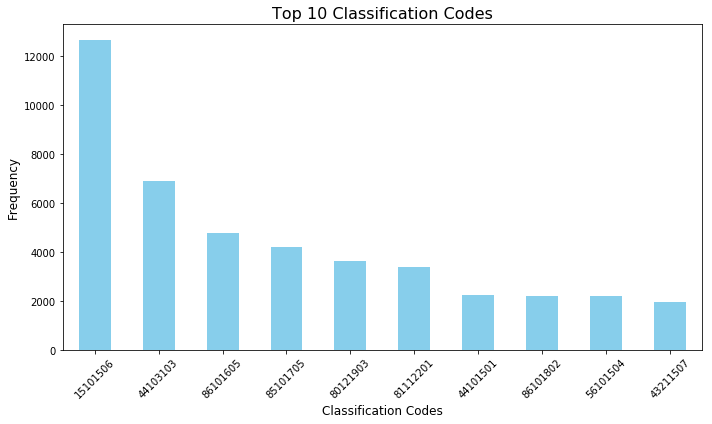

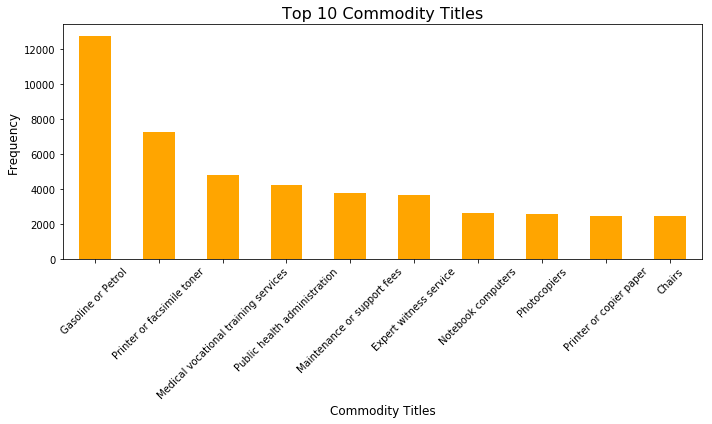

In [ ]:
# Unique values
classification_unique = df["Classification Codes"].nunique()
commodity_unique = df["Commodity Title"].nunique()
print(f"Unique Classification Codes: {classification_unique}")
print(f"Unique Commodity Titles: {commodity_unique}")

# 2. Top Values
classification_top = df["Classification Codes"].value_counts().head(10)
commodity_top = df["Commodity Title"].value_counts().head(10)

print("\nTop 10 Classification Codes:")
print(classification_top)

print("\nTop 10 Commodity Titles:")
print(commodity_top)

# 3. Relationship Between Fields
classification_to_commodity = df.groupby("Classification Codes")["Commodity Title"].unique()
print("\nClassification Codes to Commodity Titles Mapping:")
print(classification_to_commodity)

# 4. Visualization
# Frequency Distribution of Classification Codes
plt.figure(figsize=(10, 6))
classification_top.plot(kind="bar", color="skyblue")
plt.title("Top 10 Classification Codes", fontsize=16)
plt.xlabel("Classification Codes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Frequency Distribution of Commodity Titles
plt.figure(figsize=(10, 6))
commodity_top.plot(kind="bar", color="orange")
plt.title("Top 10 Commodity Titles", fontsize=16)
plt.xlabel("Commodity Titles", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Relationship Between Classification Codes and Commodity Titles
relationship = df.groupby(["Classification Codes", "Commodity Title"]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(relationship, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Relationship Between Classification Codes and Commodity Titles", fontsize=16)
plt.xlabel("Commodity Titles", fontsize=12)
plt.ylabel("Classification Codes", fontsize=12)
plt.tight_layout()
plt.show()

# Some statistical analysis on the text data to choose the embedding model

In [30]:
print(df['Department Name'].nunique())
print(df['Supplier Name'].nunique())
print(df['Supplier Qualifications'].nunique())
print(df['Acquisition Type'].nunique())
print(df['Acquisition Method'].nunique())
print(df['Item Name'].nunique())
print(df['Commodity Title'].nunique())
print(df['Item Description'].nunique())

111
24732
278
5
20
180031
13220
219510


String Length Statistics:

Field: Supplier Name
  min_length: 3.00
  max_length: 80.00
  avg_length: 23.54
  std_length: 9.31

Field: Commodity Title
  min_length: 2.00
  max_length: 119.00
  avg_length: 24.19
  std_length: 12.50

Field: Item Description
  min_length: 1.00
  max_length: 3380.00
  avg_length: 41.86
  std_length: 62.97


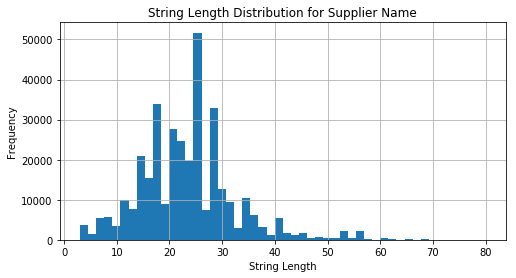

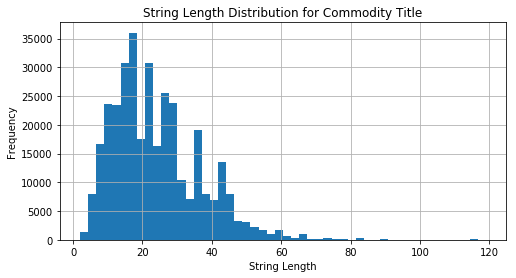

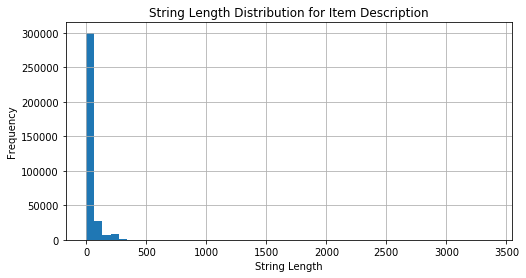


Value Counts for Department Name:
Corrections and Rehabilitation, Department of                57537
Correctional Health Care Services                            32250
Water Resources, Department of                               28331
Forestry and Fire Protection, Department of                  23244
State Hospitals, Department of                               18968
Transportation, Department of                                17644
Consumer Affairs, Department of                              15059
General Services, Department of                              10813
Highway Patrol, California                                    9527
Developmental Services, Department of                         8814
Pesticide Regulation, Department of                           8553
Parks & Recreation, Department of                             8471
Statewide Health Planning & Development, Office of            7635
Justice, Department of                                        7136
Industrial Relations, Depar

In [31]:
import pandas as pd

# Fields to analyze
fields_to_analyze = ["Supplier Name", "Commodity Title", "Item Description"]

# Calculate string lengths
length_stats = {}
for field in fields_to_analyze:
    if field in df.columns:
        lengths = df[field].dropna().str.len()
        length_stats[field] = {
            "min_length": lengths.min(),
            "max_length": lengths.max(),
            "avg_length": lengths.mean(),
            "std_length": lengths.std()
        }

# Display length statistics
print("String Length Statistics:")
for field, stats in length_stats.items():
    print(f"\nField: {field}")
    for stat, value in stats.items():
        print(f"  {stat}: {value:.2f}")

# Plot distribution of string lengths
import matplotlib.pyplot as plt

for field in fields_to_analyze:
    if field in df.columns:
        plt.figure(figsize=(8, 4))
        df[field].dropna().str.len().hist(bins=50)
        plt.title(f"String Length Distribution for {field}")
        plt.xlabel("String Length")
        plt.ylabel("Frequency")
        plt.show()

# Analyze cardinality for less unique fields
low_cardinality_fields = ["Department Name", "Supplier Qualifications", "Acquisition Type", "Acquisition Method"]

for field in low_cardinality_fields:
    if field in df.columns:
        print(f"\nValue Counts for {field}:")
        print(df[field].value_counts())